In [1]:
import pickle
import numpy 
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
#import matplotlib.pyplot as plt
import tensorflow.keras as kr 
from utils import plot_confusion_matrix,set_random_seed,sns,plt
sns.set_theme(context='notebook',style='whitegrid',palette='dark',font_scale=2.0)
%matplotlib inline

# **Carga de los modelos, los conjuntos de entrenamieto y validación**

In [2]:
models_num = [1]
models_nn = []
models_rf = []
models_svm = []

for mn in models_num:
    
    models_nn.append(load_model('models/Neural_Network/neural_network_{}.h5'.format(mn)))
    models_rf.append(pickle.load(open('models/Random_Forest/random_forest_{}'.format(mn), 'rb')))
    models_svm.append(pickle.load(open('models/SVM/svm_{}'.format(mn), 'rb')))
    

In [3]:
X_train = numpy.load('data/X_train_t.npy')
X_val = numpy.load('data/X_val_t.npy')
y_train = numpy.load('data/y_train_t.npy')
y_val = numpy.load('data/y_val_t.npy')

# **Neural Network**

In [4]:
set_random_seed(100)
Epochs = 50
Batch_size = 32
Callbacks = [kr.callbacks.EarlyStopping(min_delta=1e-3,patience=3,monitor='val_categorical_accuracy')]
models_nn[0].fit(X_train,y_train,epochs=Epochs,batch_size=Batch_size,callbacks=Callbacks,
                validation_data=(X_val,y_val))

Epoch 1/50
498/498 [==============================] - 4s 6ms/step - loss: 0.7921 - categorical_accuracy: 0.6672 - val_loss: 0.8965 - val_categorical_accuracy: 0.6150
Epoch 2/50
498/498 [==============================] - 3s 6ms/step - loss: 0.7115 - categorical_accuracy: 0.6950 - val_loss: 0.8839 - val_categorical_accuracy: 0.6201
Epoch 3/50
498/498 [==============================] - 3s 6ms/step - loss: 0.6919 - categorical_accuracy: 0.7045 - val_loss: 0.8761 - val_categorical_accuracy: 0.6331
Epoch 4/50
498/498 [==============================] - 3s 6ms/step - loss: 0.6822 - categorical_accuracy: 0.7094 - val_loss: 0.8778 - val_categorical_accuracy: 0.6289
Epoch 5/50
498/498 [==============================] - 3s 6ms/step - loss: 0.6751 - categorical_accuracy: 0.7150 - val_loss: 0.8777 - val_categorical_accuracy: 0.6414
Epoch 6/50
498/498 [==============================] - 3s 6ms/step - loss: 0.6701 - categorical_accuracy: 0.7191 - val_loss: 0.8770 - val_categorical_accuracy: 0.6349
Epoc

68/68 [==============================] - 0s 1ms/step


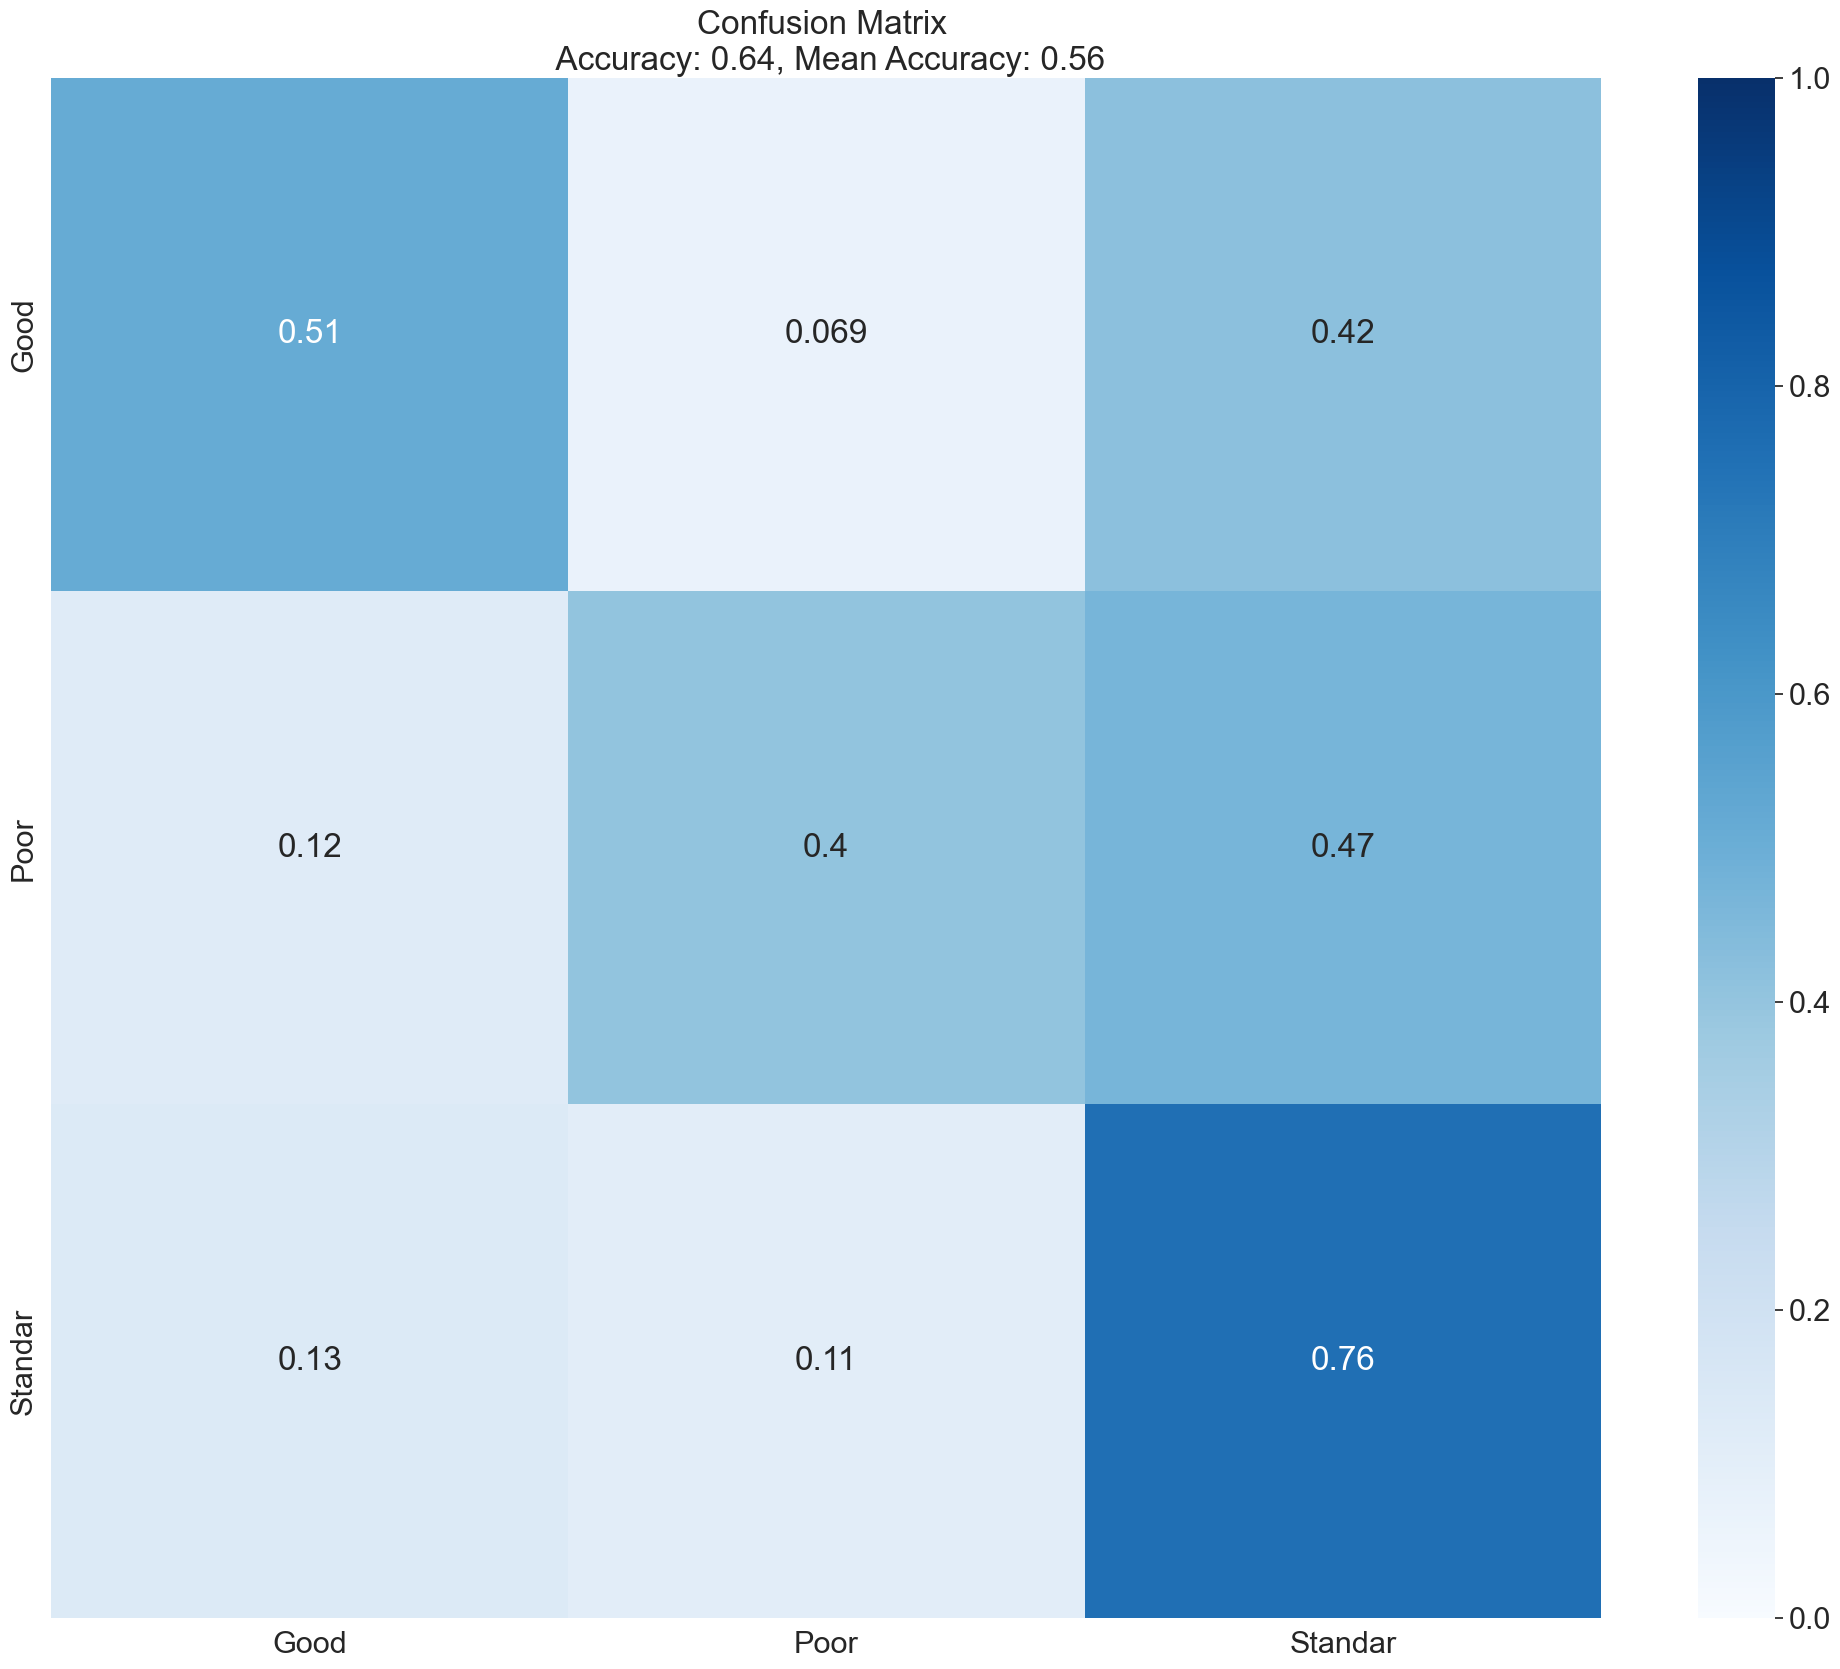

In [5]:
y_val_pred = models_nn[0].predict(X_val).argmax(axis=1)
conf_matrix = confusion_matrix(y_val.argmax(axis=1),y_val_pred)
plot_confusion_matrix(conf_matrix,classes=['Good','Poor','Standar'])

# **Random Forest**

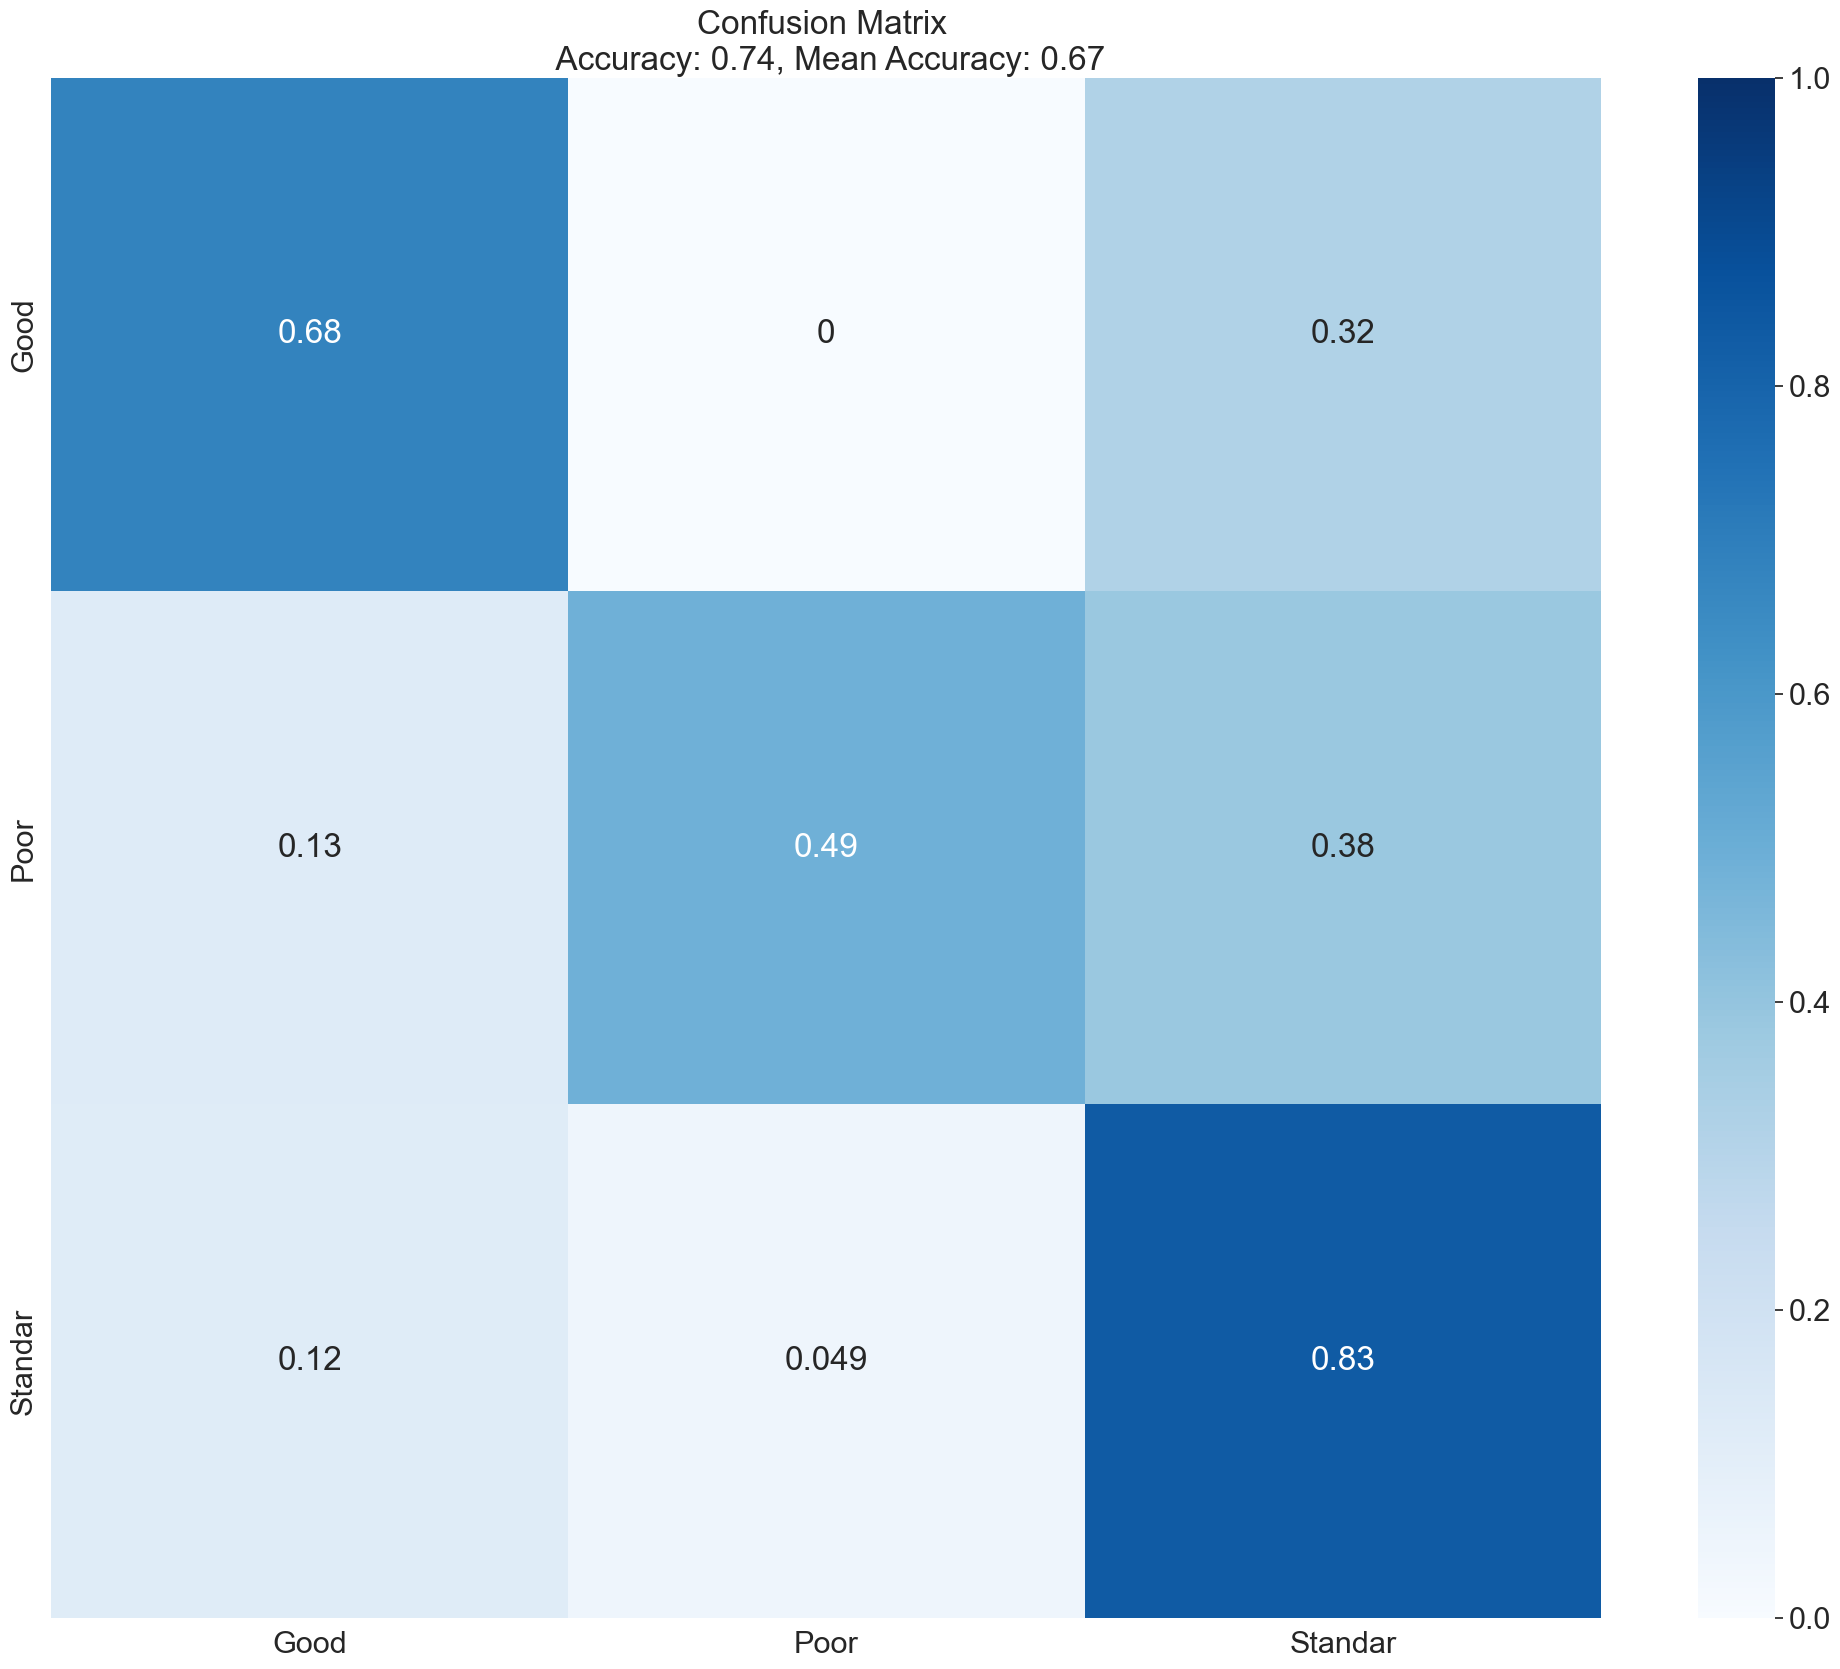

In [6]:
models_rf[0].fit(X_train,y_train)
y_val_pred = models_rf[0].predict(X_val).argmax(axis=1)
conf_matrix = confusion_matrix(y_val.argmax(axis=1),y_val_pred)
plot_confusion_matrix(conf_matrix,classes=['Good','Poor','Standar'])

# **Suport Vector Machine**

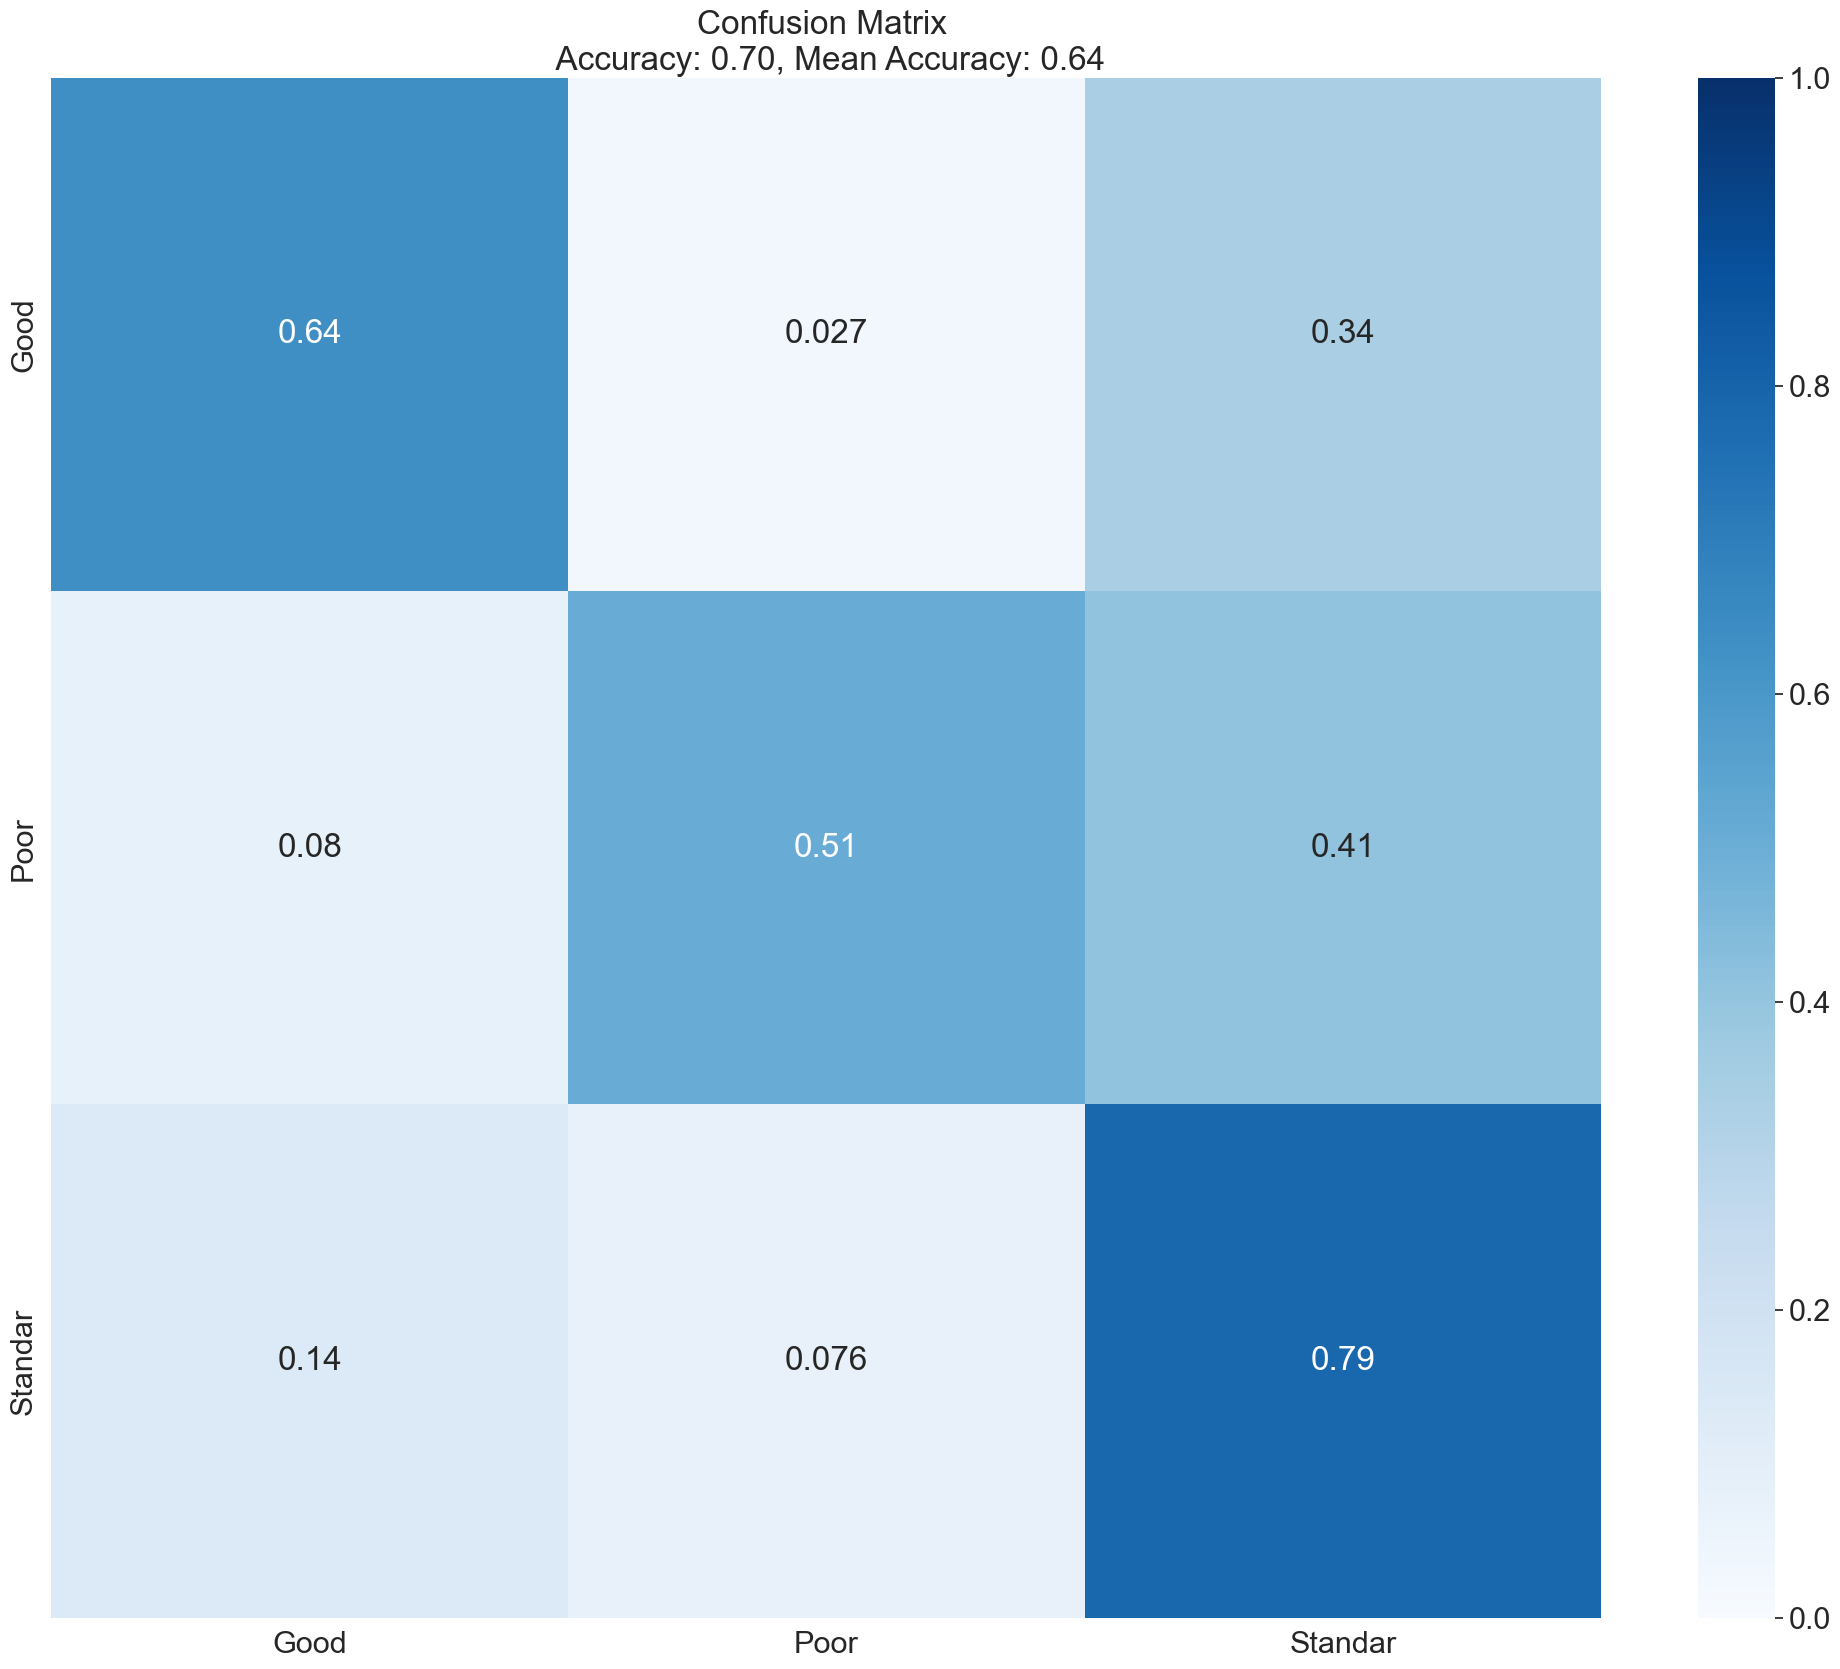

In [7]:
models_svm[0].fit(X_train,y_train.argmax(axis=1))
y_val_pred = models_svm[0].predict(X_val)
conf_matrix = confusion_matrix(y_val.argmax(axis=1),y_val_pred)
plot_confusion_matrix(conf_matrix,classes=['Good','Poor','Standar'])

# **Método de datos desbalanceados**

In [8]:
from imblearn.over_sampling import SMOTE

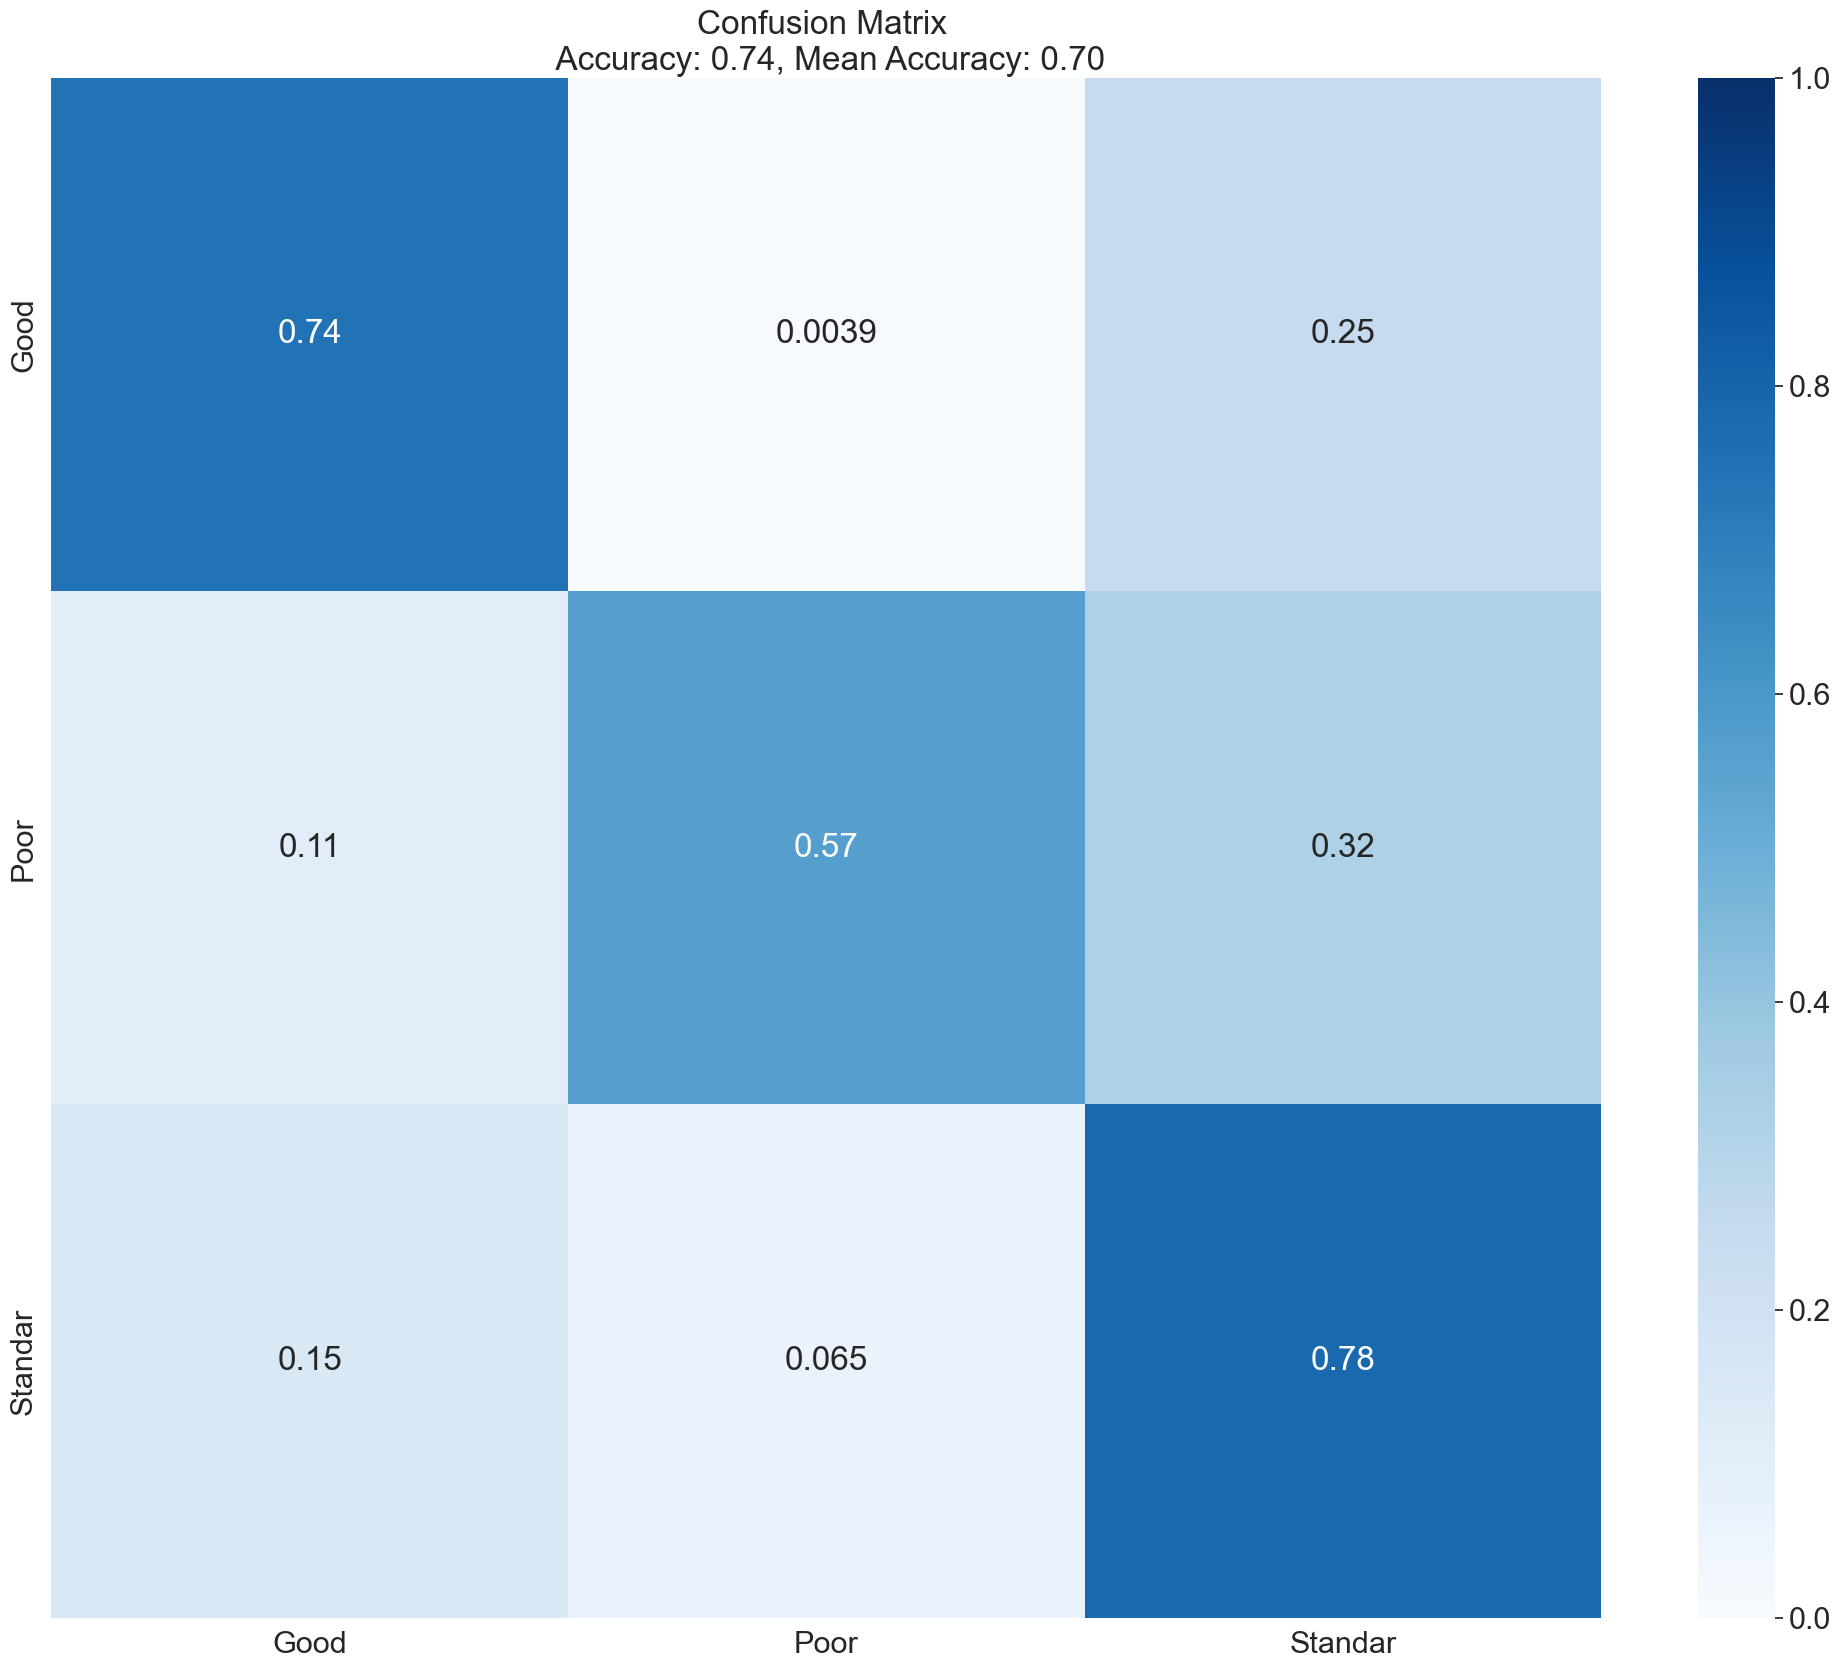

In [9]:
method_smote = SMOTE(random_state=100)

X_train_res, y_train_res = method_smote.fit_resample(X_train,y_train)

models_rf[0].fit(X_train_res,y_train_res)

y_val_pred = models_rf[0].predict(X_val).argmax(axis=1)

conf_matrix = confusion_matrix(y_val.argmax(axis=1),y_val_pred)

plot_confusion_matrix(conf_matrix,classes=['Good','Poor','Standar'])

In [16]:
X = numpy.concatenate((X_train,X_val))
y = numpy.concatenate((y_train,y_val))

In [17]:
# Se ajusta el modelo con todos los datos
X_train_res, y_train_res = method_smote.fit_resample(X_train,y_train)
models_rf[0].fit(X_train_res,y_train_res)

RandomForestClassifier(criterion='log_loss', max_depth=43, n_estimators=209,
                       random_state=100)

In [20]:
# Guardamos el modelo para su uso posterior
pickle.dump(models_rf[0], open('models/Random_Forest/final_model', 'wb'))

# **Concluciones**

Al calcular la precisión y la precisión media de los modelos en el conjunto de validación, se concluye que el modelo de Random Forest maximiza estas métricas, 73% y 67% respectivamente. Por último, debido a que había un desbalance en la variable respuesta (*Credit_Score*), se decidió aplicar el método SMOTE para obtener un conjunto de entrenamiento balanceado. Al ajustar el modelo con estos nuevos datos la precisión para el conjunto de prueba fue similar, pero en cambio la precisión media se incrementó al 70% y por lo tanto  se considera que este último modelo es el adecuado para realizar las predicciones futuras.